# 1. Data Loading From Excel

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import importlib
import utils

In [55]:
importlib.reload(utils)

<module 'utils' from '/home/tux/ml_proyecto_final/notebooks/utils.py'>

In [56]:
# Obtaining a workable dataset

df = pd.read_excel("../data/raw/appendicitis_tabular_data.xlsx", sheet_name=0)
df.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


In [57]:
# data = pd.read_excel("https://zenodo.org/record/7711412/files/app_data.xlsx?download=1", sheet_name=0)

### Ideas for later:
- Categorize BMI values into underweight, normal, overweight, and obese.
- Maybe categorize child age into groups like infant, toddler, preschooler, school-age, adolescent. 

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Management                        781 non-null    object 
 7   Severity                          781 non-null    object 
 8   Diagnosis_Presumptive             780 non-null    object 
 9   Diagnosis                         780 non-null    object 
 10  Alvarado_Score                    730 non-null    float64
 11  Paedriatic_Appendicitis_Score     730 non-null    float64
 12  Appendix

In [59]:
df.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


In [60]:
df.shape

(782, 58)

In [61]:
df.describe()

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP,US_Number
count,781.000000,755.000000,756.000000,779.000000,778.000000,730.000000,730.000000,498.000000,775.000000,776.000000,679.000000,54.000000,764.000000,764.000000,756.000000,764.000000,771.000000,760.000000
mean,11.346483,18.906916,148.017460,43.172542,4.284062,5.921918,5.253425,7.762651,37.404516,12.670683,71.791163,64.929630,4.799490,13.380497,13.180291,285.252618,31.387899,425.515789
std,3.529979,4.385252,19.732016,17.390984,2.574057,2.155972,1.958456,2.536671,0.903678,5.366525,14.463656,15.085025,0.499012,1.393271,4.538774,72.494373,57.433588,271.585211
min,0.000000,7.827983,53.000000,3.960000,1.000000,0.000000,0.000000,2.700000,26.900000,2.600000,27.200000,32.000000,3.620000,8.200000,11.200000,91.000000,0.000000,1.000000
25%,9.200000,15.725294,137.000000,29.500000,3.000000,4.000000,4.000000,6.000000,36.800000,8.200000,61.400000,54.500000,4.537500,12.600000,12.300000,236.000000,1.000000,198.750000
50%,11.438741,18.062284,149.650000,41.400000,3.000000,6.000000,5.000000,7.500000,37.200000,12.000000,75.500000,64.500000,4.780000,13.300000,12.700000,276.000000,7.000000,398.500000
75%,14.099932,21.179011,163.000000,54.000000,5.000000,8.000000,7.000000,9.100000,37.900000,16.200000,83.600000,77.500000,5.020000,14.000000,13.300000,330.000000,33.000000,613.250000
max,18.360000,38.156221,192.000000,103.000000,28.000000,10.000000,10.000000,17.000000,40.200000,37.700000,97.700000,91.000000,14.000000,36.000000,86.900000,708.000000,365.000000,992.000000


In [62]:
df.dtypes

Age                                 float64
BMI                                 float64
Sex                                  object
Height                              float64
Weight                              float64
Length_of_Stay                      float64
Management                           object
Severity                             object
Diagnosis_Presumptive                object
Diagnosis                            object
Alvarado_Score                      float64
Paedriatic_Appendicitis_Score       float64
Appendix_on_US                       object
Appendix_Diameter                   float64
Migratory_Pain                       object
Lower_Right_Abd_Pain                 object
Contralateral_Rebound_Tenderness     object
Coughing_Pain                        object
Nausea                               object
Loss_of_Appetite                     object
Body_Temperature                    float64
WBC_Count                           float64
Neutrophil_Percentage           

In [63]:
print("Duplicated rows:", df.duplicated().sum())

Duplicated rows: 0


# Missing values analysis

In [64]:
df.isnull().sum()

Age                                   1
BMI                                  27
Sex                                   2
Height                               26
Weight                                3
Length_of_Stay                        4
Management                            1
Severity                              1
Diagnosis_Presumptive                 2
Diagnosis                             2
Alvarado_Score                       52
Paedriatic_Appendicitis_Score        52
Appendix_on_US                        5
Appendix_Diameter                   284
Migratory_Pain                        9
Lower_Right_Abd_Pain                  8
Contralateral_Rebound_Tenderness     15
Coughing_Pain                        16
Nausea                                8
Loss_of_Appetite                     10
Body_Temperature                      7
WBC_Count                             6
Neutrophil_Percentage               103
Segmented_Neutrophils               728
Neutrophilia                         50


In [82]:
missing_count = df.isnull().sum()
missing_pct = 100 * missing_count / len(df)
missing = pd.concat([missing_count, missing_pct], axis=1)
missing.columns = ['missing_count', 'missing_pct']
missing = missing.sort_values('missing_pct', ascending=False)
missing.head(35)

,missing_count,missing_pct
Abscess_Location,769,98.337596
Gynecological_Findings,756,96.675192
Conglomerate_of_Bowel_Loops,739,94.501279
Segmented_Neutrophils,728,93.094629
Ileus,722,92.327366
Perfusion,719,91.943734
Enteritis,716,91.560102
Appendicolith,713,91.176471
Coprostasis,711,90.920716
Perforation,701,89.641944


There are many columns with a high percentage of missing values. This amount of missing data is expected since many of this columns refers to data obtain via an CT which is only ordered on certain cases. We will select the columns with more than 10% of missing values and drop them from the dataset. Then, we will analyze the top N columns with the most missing values among the remaining columns.

Too many missing values in some columns, lets understand better with a graph

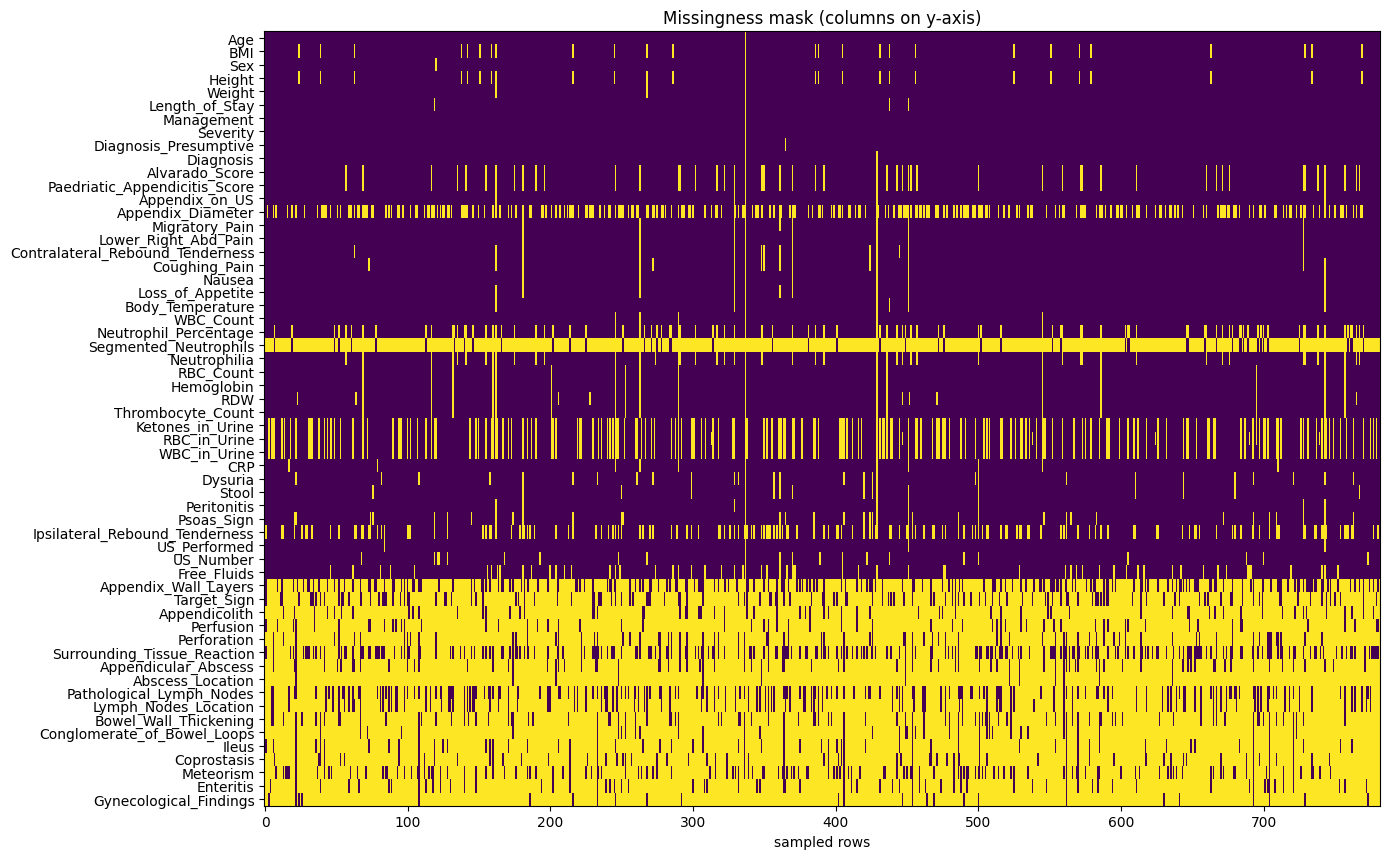

In [66]:
nrows = min(len(df), 1000)
sample = df.sample(n=nrows, random_state=0)

mask = sample.isnull().T  # transpose to have columns on y-axis

plt.figure(figsize=(14, max(6, 0.15*mask.shape[0])))
plt.imshow(mask, aspect='auto', interpolation='nearest')
plt.yticks(ticks=np.arange(len(mask.index)), labels=mask.index)
plt.xlabel('sampled rows')
plt.title('Missingness mask (columns on y-axis)')
plt.tight_layout()
plt.show()

Lets verify if there are any correlations between the missing values in the dataset

In [83]:
import missingno as msno

In [86]:
TOP_N = 24

# get top N columns with most missing values
top_missing_cols = (
    df.isnull().sum()
    .sort_values(ascending=False)
    .head(TOP_N)
    .index
)

df_top_missing = df[top_missing_cols]
df_top_missing.columns

Index(['Abscess_Location', 'Gynecological_Findings',
       'Conglomerate_of_Bowel_Loops', 'Segmented_Neutrophils', 'Ileus',
       'Perfusion', 'Enteritis', 'Appendicolith', 'Coprostasis', 'Perforation',
       'Appendicular_Abscess', 'Bowel_Wall_Thickening', 'Lymph_Nodes_Location',
       'Target_Sign', 'Meteorism', 'Pathological_Lymph_Nodes',
       'Appendix_Wall_Layers', 'Surrounding_Tissue_Reaction',
       'Appendix_Diameter', 'RBC_in_Urine', 'Ketones_in_Urine', 'WBC_in_Urine',
       'Ipsilateral_Rebound_Tenderness', 'Neutrophil_Percentage'],
      dtype='object')

<Axes: >

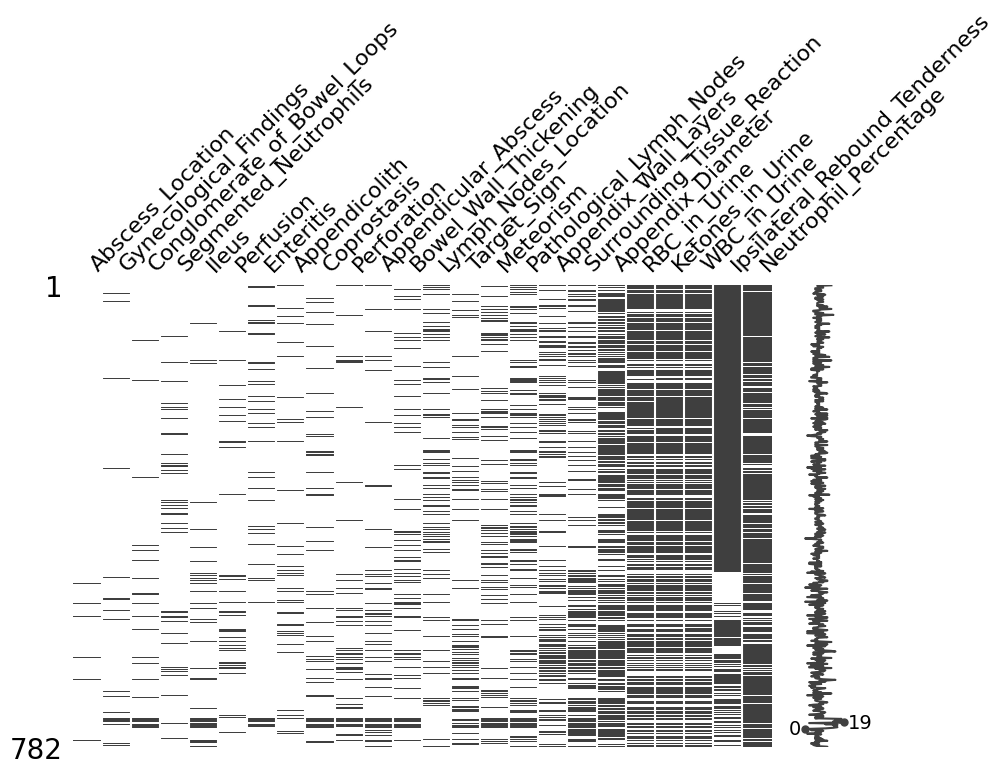

In [87]:
msno.matrix(df_top_missing, figsize=(10, 6))

In [90]:
to_drop_cols = high_missing_cols = df.columns[df.isnull().mean() > 0.1].tolist()

In [91]:
to_drop_cols

['Appendix_Diameter',
 'Neutrophil_Percentage',
 'Segmented_Neutrophils',
 'Ketones_in_Urine',
 'RBC_in_Urine',
 'WBC_in_Urine',
 'Ipsilateral_Rebound_Tenderness',
 'Appendix_Wall_Layers',
 'Target_Sign',
 'Appendicolith',
 'Perfusion',
 'Perforation',
 'Surrounding_Tissue_Reaction',
 'Appendicular_Abscess',
 'Abscess_Location',
 'Pathological_Lymph_Nodes',
 'Lymph_Nodes_Location',
 'Bowel_Wall_Thickening',
 'Conglomerate_of_Bowel_Loops',
 'Ileus',
 'Coprostasis',
 'Meteorism',
 'Enteritis',
 'Gynecological_Findings']

In [92]:

ref_cols = ['US_Performed', 'CT_Performed', 'MRI_Performed', 'Age', 'Sex']
summary = utils.missingness_auc_summary(df, target_cols=to_drop_cols, ref_cols=ref_cols, fill_ref_na=np.nan)
display(summary.head(50))

,ref_col,target_col,n_total,n_missing,pct_missing,auc,auc_abs_dev_from_0_5
62,Sex,Abscess_Location,782,769,0.983376,0.448635,0.051365
14,US_Performed,Abscess_Location,782,769,0.983376,0.487646,0.012354
38,Age,Abscess_Location,782,769,0.983376,NaN,NaN
71,Sex,Gynecological_Findings,782,756,0.966752,0.685847,0.185847
23,US_Performed,Gynecological_Findings,782,756,0.966752,0.487434,0.012566
47,Age,Gynecological_Findings,782,756,0.966752,NaN,NaN
66,Sex,Conglomerate_of_Bowel_Loops,782,739,0.945013,0.513579,0.013579
18,US_Performed,Conglomerate_of_Bowel_Loops,782,739,0.945013,0.487145,0.012855
42,Age,Conglomerate_of_Bowel_Loops,782,739,0.945013,NaN,NaN
50,Sex,Segmented_Neutrophils,782,728,0.930946,0.438111,0.061889


In [93]:
df_less_missing = df.drop(columns=to_drop_cols)
df_less_missing.shape

(782, 34)

In [ ]:
df_less_missing["US_Performed"]

0      False
1      False
2      False
3      False
4      False
       ...  
777    False
778    False
779    False
780    False
781    False
Name: US_Performed, Length: 782, dtype: bool

In [94]:
TOP_N = 15

top_missing_cols = utils.get_top_missing_columns(df_less_missing, top_n=TOP_N)

df_top_missing = df_less_missing[top_missing_cols]
df_top_missing.columns

Index(['Free_Fluids', 'Paedriatic_Appendicitis_Score', 'Alvarado_Score',
       'Neutrophilia', 'Psoas_Sign', 'Dysuria', 'BMI', 'Height', 'RDW',
       'US_Number', 'Hemoglobin', 'RBC_Count', 'Thrombocyte_Count', 'Stool',
       'Coughing_Pain'],
      dtype='object')

<Axes: >

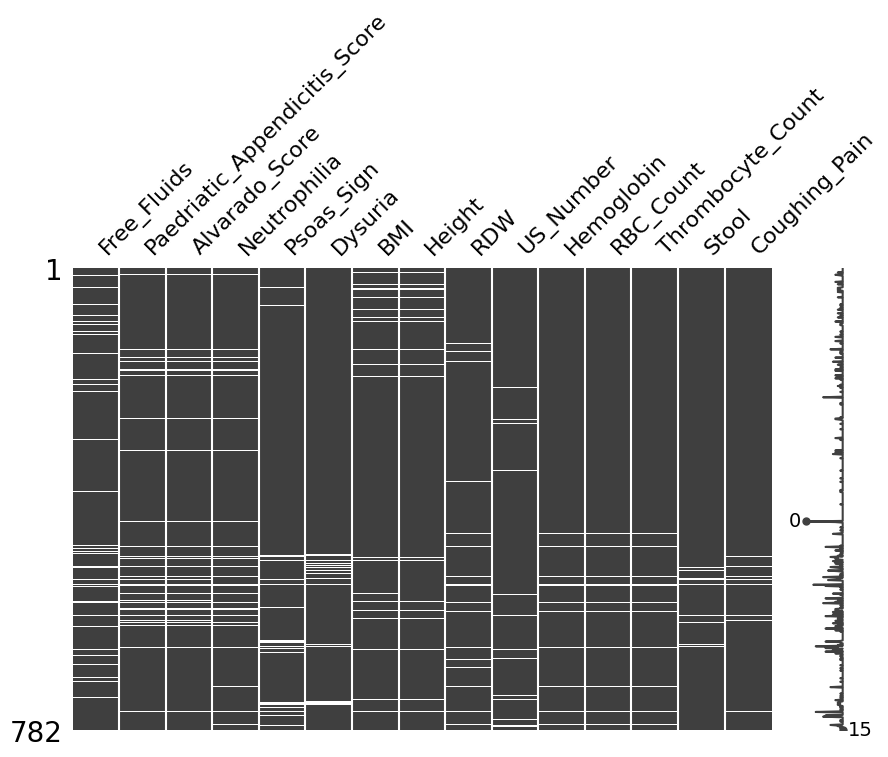

In [95]:
msno.matrix(df_top_missing, figsize=(10, 6))

In [96]:
missing_count = df_top_missing.isnull().sum()
missing_pct = 100 * missing_count / len(df)
missing = pd.concat([missing_count, missing_pct], axis=1)
missing.columns = ['missing_count', 'missing_pct']
missing = missing.sort_values('missing_pct', ascending=False)
missing.head(30)

,missing_count,missing_pct
Free_Fluids,63,8.056266
Paedriatic_Appendicitis_Score,52,6.649616
Alvarado_Score,52,6.649616
Neutrophilia,50,6.393862
Psoas_Sign,37,4.731458
Dysuria,29,3.708440
BMI,27,3.452685
Height,26,3.324808
RDW,26,3.324808
US_Number,22,2.813299


In [97]:
ref_cols = ['US_Performed', 'CT_Performed', 'MRI_Performed', 'Age', 'Sex']
summary = utils.missingness_auc_summary(df, target_cols=top_missing_cols, ref_cols=ref_cols, fill_ref_na=np.nan)
display(summary.head(50))

,ref_col,target_col,n_total,n_missing,pct_missing,auc,auc_abs_dev_from_0_5
0,US_Performed,Free_Fluids,782,63,0.080563,0.358004,0.141996
30,Sex,Free_Fluids,782,63,0.080563,0.458033,0.041967
15,Age,Free_Fluids,782,63,0.080563,NaN,NaN
1,US_Performed,Paedriatic_Appendicitis_Score,782,52,0.066496,0.420034,0.079966
2,US_Performed,Alvarado_Score,782,52,0.066496,0.420034,0.079966
31,Sex,Paedriatic_Appendicitis_Score,782,52,0.066496,0.436104,0.063896
32,Sex,Alvarado_Score,782,52,0.066496,0.436104,0.063896
16,Age,Paedriatic_Appendicitis_Score,782,52,0.066496,NaN,NaN
17,Age,Alvarado_Score,782,52,0.066496,NaN,NaN
3,US_Performed,Neutrophilia,782,50,0.063939,0.448689,0.051311


For now lets drop all the missing values, but we will later revisit this decision.
Many of the top missings values seems to be related to CT scan findings, which are only available when a CT scan is performed. Since not all patients undergo a CT scan, these columns will have a high percentage of missing values. These are values that we cannot recover unless we have access to the CT scan data for all patients.

### Dropping the missing values

In [98]:
df_no_missing_values = df_less_missing.dropna()
df_no_missing_values.shape

(589, 34)

In [99]:
df_no_missing_values.describe(include='all')

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,RDW,Thrombocyte_Count,CRP,Dysuria,Stool,Peritonitis,Psoas_Sign,US_Performed,US_Number,Free_Fluids
count,589.000000,589.000000,589,589.000000,589.000000,589.000000,589,589,589,589,...,589.000000,589.000000,589.000000,589,589,589,589,589,589.000000,589
unique,NaN,NaN,2,NaN,NaN,NaN,3,2,8,2,...,NaN,NaN,NaN,2,4,3,2,1,NaN,2
top,NaN,NaN,male,NaN,NaN,NaN,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,NaN,NaN,no,normal,no,no,yes,NaN,no
freq,NaN,NaN,308,NaN,NaN,NaN,403,522,519,333,...,NaN,NaN,NaN,555,429,430,404,589,NaN,350
mean,11.447904,18.987127,NaN,148.714092,43.841851,4.059423,NaN,NaN,NaN,NaN,...,13.241596,283.276740,26.827504,NaN,NaN,NaN,NaN,NaN,414.354839,NaN
std,3.402902,4.469938,NaN,19.289739,17.562232,2.381519,NaN,NaN,NaN,NaN,...,5.117685,68.645916,50.088171,NaN,NaN,NaN,NaN,NaN,277.254221,NaN
min,0.533881,7.827983,NaN,83.500000,12.200000,1.000000,NaN,NaN,NaN,NaN,...,11.200000,91.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,9.390000,15.750000,NaN,138.000000,30.200000,3.000000,NaN,NaN,NaN,NaN,...,12.300000,237.000000,1.000000,NaN,NaN,NaN,NaN,NaN,180.000000,NaN
50%,11.479808,18.062284,NaN,150.000000,42.000000,3.000000,NaN,NaN,NaN,NaN,...,12.700000,276.000000,7.000000,NaN,NaN,NaN,NaN,NaN,376.000000,NaN
75%,14.099932,21.218317,NaN,163.000000,55.200000,4.000000,NaN,NaN,NaN,NaN,...,13.300000,326.000000,29.000000,NaN,NaN,NaN,NaN,NaN,616.000000,NaN


Check US_Performed agains US_Number for the missing values

In [118]:
categorical_cols = df_no_missing_values.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(col, df_no_missing_values[col].unique())

Sex ['female' 'male']
Management ['conservative' 'primary surgical' 'secondary surgical']
Severity ['uncomplicated' 'complicated']
Diagnosis_Presumptive ['appendicitis' 'Appendizitis, Lymphadenitis mesenterialis'
 'Appendizitis/ Lymphadenitis mesenterialis' 'no appendicitis'
 'chronische Appendizitis' 'prolongierte Gastroenteritis'
 'Gastroenteritis' 'diabetische Ketoazidose, Myokarditis']
Diagnosis ['appendicitis' 'no appendicitis']
Appendix_on_US ['yes' 'no']
Migratory_Pain ['no' 'yes']
Lower_Right_Abd_Pain ['yes' 'no']
Contralateral_Rebound_Tenderness ['yes' 'no']
Coughing_Pain ['no' 'yes']
Nausea ['no' 'yes']
Loss_of_Appetite ['yes' 'no']
Neutrophilia ['no' 'yes']
Dysuria ['no' 'yes']
Stool ['normal' 'constipation' 'diarrhea' 'constipation, diarrhea']
Peritonitis ['no' 'local' 'generalized']
Psoas_Sign ['yes' 'no']
US_Performed ['yes']
Free_Fluids ['no' 'yes']


In [114]:
df_no_missing_values["Diagnosis_Presumptive"].unique()

array(['appendicitis', 'Appendizitis, Lymphadenitis mesenterialis',
       'Appendizitis/ Lymphadenitis mesenterialis', 'no appendicitis',
       'chronische Appendizitis', 'prolongierte Gastroenteritis',
       'Gastroenteritis', 'diabetische Ketoazidose, Myokarditis'],
      dtype=object)

In [115]:
df_no_missing_values["Stool"].unique()

array(['normal', 'constipation', 'diarrhea', 'constipation, diarrhea'],
      dtype=object)

In [116]:
df_no_missing_values["Peritonitis"].unique()

array(['no', 'local', 'generalized'], dtype=object)